In [ ]:
CREATE TABLE Video(
   id_video INT AUTO_INCREMENT,
   type VARCHAR(50) ,
   date_de_sortie DATE,
   duree TIME,
   nom_video VARCHAR(255) ,
   PRIMARY KEY(id_video)
);

CREATE TABLE Categorie(
   id_categorie INT AUTO_INCREMENT,
   nom_categorie VARCHAR(50) ,
   PRIMARY KEY(id_categorie)
);

CREATE TABLE Acteur(
   id_acteur INT AUTO_INCREMENT,
   nom_acteur VARCHAR(50) ,
   prenom VARCHAR(50) ,
   date_de_naissance DATE,
   PRIMARY KEY(id_acteur)
);

CREATE TABLE Utilisateur(
   id_username INT AUTO_INCREMENT,
   username VARCHAR(50) ,
   PRIMARY KEY(id_username)
);

CREATE TABLE Pays(
   id_pays INT AUTO_INCREMENT,
   nom VARCHAR(50) ,
   PRIMARY KEY(id_pays)
);

CREATE TABLE Appartient(
   id_video INT,
   id_categorie INT,
   PRIMARY KEY(id_video, id_categorie),
   FOREIGN KEY(id_video) REFERENCES Video(id_video),
   FOREIGN KEY(id_categorie) REFERENCES Categorie(id_categorie)
);

CREATE TABLE like_interaction(
   id_video INT,
   id_username INT,
   date_like DATE,
   id_pays INT,
   PRIMARY KEY(id_video, id_username),
   FOREIGN KEY(id_video) REFERENCES Video(id_video),
   FOREIGN KEY(id_username) REFERENCES Utilisateur(id_username)
);

CREATE TABLE joue_dans_(
   id_video INT,
   id_acteur INT,
   PRIMARY KEY(id_video, id_acteur),
   FOREIGN KEY(id_video) REFERENCES Video(id_video),
   FOREIGN KEY(id_acteur) REFERENCES Acteur(id_acteur)
);

CREATE TABLE vue_interaction(
   id_video INT,
   id_username INT,
   date_vue DATE,
   id_pays INT,
   PRIMARY KEY(id_video, id_username),
   FOREIGN KEY(id_video) REFERENCES Video(id_video),
   FOREIGN KEY(id_username) REFERENCES Utilisateur(id_username)
);


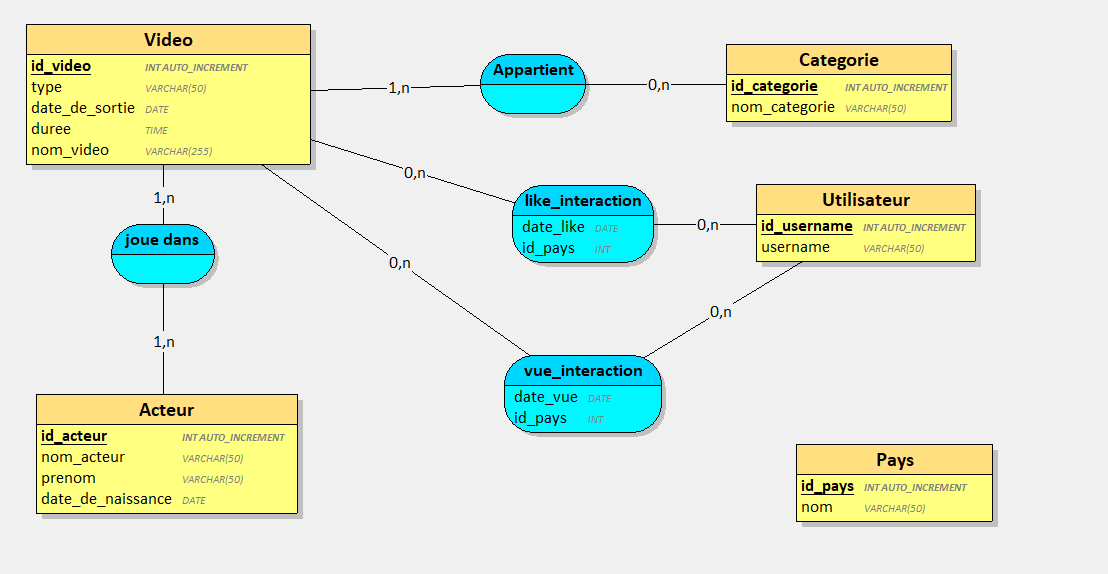

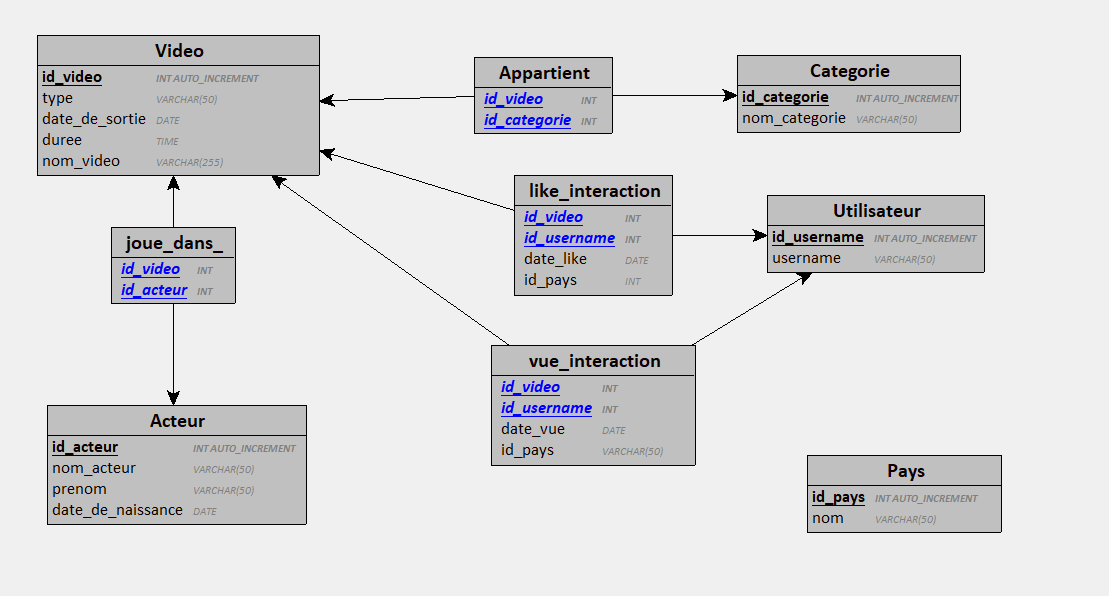

In [ ]:
-- Insertion des catégories
INSERT INTO Categorie (nom_categorie) VALUES
('Action'), ('Comédie'), ('Drame'), ('Science-Fiction'), ('Horreur'), ('Romance'), ('Aventure'), ('Animation'), ('Thriller'), ('Documentaire');

-- Insertion des pays
INSERT INTO Pays (nom) VALUES
('France'), ('USA'), ('Allemagne'), ('Japon'), ('Canada'), ('Italie'), ('Espagne'), ('Royaume-Uni'), ('Inde'), ('Brésil');

-- Insertion des utilisateurs
INSERT INTO Utilisateur (username) VALUES
('Alice'),('Bob'),('Charlie'),('David'),('Eve'),('Frank'),('Grace'),('Heidi'),('Ivan'),('Judy'),
('Karl'),('Laura'),('Mallory'),('Niaj'),('Olivia'),('Peggy'),('Quentin'),('Rupert'),('Sybil'),('Trent');

-- Insertion des acteurs
INSERT INTO Acteur (nom_acteur, prenom, date_de_naissance) VALUES
('Smith','Will','1968-09-25'),
('Johansson','Scarlett','1984-11-22'),
('DiCaprio','Leonardo','1974-11-11'),
('Pitt','Brad','1963-12-18'),
('Roberts','Julia','1967-10-28'),
('Hanks','Tom','1956-07-09'),
('Portman','Natalie','1981-06-09'),
('Damon','Matt','1970-10-08'),
('Watson','Emma','1990-04-15'),
('Clooney','George','1961-05-06');

-- Insertion des vidéos
INSERT INTO Video (type, date_de_sortie, duree, nom_video) VALUES
('Film','2020-01-15','02:00:00','Le Grand Aventure'),
('Film','2019-07-22','01:45:00','Rires et Larmes'),
('Série','2021-03-10','00:45:00','Mystère au Manoir'),
('Film','2018-12-05','02:30:00','Voyage Interstellaire'),
('Série','2022-05-18','00:50:00','Enquête Nocturne'),
('Film','2020-08-14','01:55:00','Romance Eternelle'),
('Film','2019-11-09','02:10:00','Horreur Profonde'),
('Série','2021-09-30','00:40:00','Comédie Universelle'),
('Film','2022-02-20','02:05:00','Action Ultime'),
('Film','2017-06-25','01:50:00','Documentaire Nature');

-- Appartient aux catégories
INSERT INTO Appartient (id_video, id_categorie) VALUES
(1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,5),(8,2),(9,1),(10,10);

-- Acteurs dans vidéos
INSERT INTO joue_dans_ (id_video, id_acteur) VALUES
(1,1),(1,2),(2,3),(2,4),(3,5),(3,6),(4,7),(5,8),(6,9),(7,10);

-- Likes d’utilisateurs
INSERT INTO like_interaction (id_video, id_username, date_like, id_pays) VALUES
(1,1,'2023-01-10',1),(2,2,'2023-01-11',2),(3,3,'2023-01-12',3),(4,4,'2023-01-13',4),
(5,5,'2023-01-14',5),(6,6,'2023-01-15',6),(7,7,'2023-01-16',7),(8,8,'2023-01-17',8),
(9,9,'2023-01-18',9),(10,10,'2023-01-19',10);

-- Vues des utilisateurs
INSERT INTO vue_interaction (id_video, id_username, date_vue, id_pays) VALUES
(1,1,'2023-01-05',1),(2,2,'2023-01-06',2),(3,3,'2023-01-07',3),(4,4,'2023-01-08',4),
(5,5,'2023-01-09',5),(6,6,'2023-01-10',6),(7,7,'2023-01-11',7),(8,8,'2023-01-12',8),
(9,9,'2023-01-13',9),(10,10,'2023-01-14',10);


In [ ]:
SELECT v.nom_video AS nom, p.nom AS pays, COUNT(*) AS vues
FROM vue_interaction vi
JOIN Video v ON vi.id_video = v.id_video
JOIN Pays p ON vi.id_pays = p.id_pays
GROUP BY v.nom_video, p.nom
ORDER BY p.nom, vues DESC
LIMIT 5;
